In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')

In [2]:
# read whole year data
allFiles = glob.glob("data/*/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,encoding="utf-8")
    list_.append(df)
df = pd.concat(list_)

In [3]:
# # read whole year data
# allFiles = glob.glob("data/2014/*.csv")
# allFiles.extend(glob.glob("data/2015/*.csv"))
# allFiles.extend(glob.glob("data/2016/*.csv"))
# allFiles.extend(glob.glob("data/2017/*.csv"))

# df = pd.DataFrame()
# list_ = []
# for file_ in allFiles:
#     df = pd.read_csv(file_,index_col=None, header=0,encoding="utf-8")
#     list_.append(df)
# df = pd.concat(list_)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
def transform_cols(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace('_', ' ')
    return df

In [6]:
df = transform_cols(df)

In [7]:
df.groupby(['rejected reason']).size() \
    .reset_index(name="counts") \
    .sort_values(['counts'], ascending=False)

,rejected reason,counts
5,No start - Cannot contact,86134
13,No start - Not serious/Researching,46457
23,No start - Withdrawn from market,16712
24,No start - Wrong Number,13432
9,No start - Insufficient income,9691
8,No start - Insufficient deposit or savings,8660
2,No start - Can't dislodge lender,8174
10,No start - No lender match,5902
3,No start - Can't dislodge other broker,3068
18,No start - Refinance NOT cost effective,3056


In [8]:
selected_features = ['marketing code','enquired',
                     'loan amount','loan reason','property use']
# selected_features = ['marketing code','enquired',
#                      'loan amount','loan reason','property use']
# selected_features = ['marketing code','enquired','loan amount','property use']
target = 'enquiry status';
whole_set = selected_features + [target]

df = df[whole_set]

In [9]:
df = df[~df[target].isin(['In Progress','Just Received','On Hold'])]
df.shape

(252252, 6)

In [10]:
df['loan amount'].fillna(0,inplace=True)

In [11]:
# convert to string to do replacement
df['loan amount'] = df['loan amount'].astype("str")
df['loan amount'] = df['loan amount'].str.replace(",","")

In [12]:
invalid_columns= ['500001-$1000000',
                  '300001-$500000',
                  '0-$300000',
                  '250000 - 300000',
                  '250000-350000',
                  '2600 monthly',
                  'not_sure',
                  '1000,001+',
                 '9999-',
                  'I50000',
                  '1.5 M',
                  '1000001+',
                  '9999-',
                  '80-90k']

In [13]:
df = df[~df['loan amount'].isin(invalid_columns)]
df.shape

(251490, 6)

In [14]:
for _ in df.columns:
    print("The number of null values in: {} == {}".format(_, df[_].isnull().sum()))

The number of null values in: marketing code == 354
The number of null values in: enquired == 0
The number of null values in: loan amount == 0
The number of null values in: loan reason == 22567
The number of null values in: property use == 51944
The number of null values in: enquiry status == 0


In [15]:
df.dropna(axis=0, how='any', inplace=True)
# df = df[~df['marketing code'].isnull()]
# df = df[~df['post code'].isnull()]
# df = df[~df['suburb'].isnull()]
# df = df[~df['loan reason'].isnull()]
# df = df[~df['property use'].isnull()]
df.shape

(199172, 6)

In [16]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:marketing code == 0
The number of null values in:enquired == 0
The number of null values in:loan amount == 0
The number of null values in:loan reason == 0
The number of null values in:property use == 0
The number of null values in:enquiry status == 0


In [17]:
drop_values = ['QLD','victoria',"270-1176","VIC","2575b","6110r","2150s"]
if 'post code' in df.columns: 
    df = df[~df['post code'].isin(drop_values)]

In [18]:
def transform(df): 
    df['loan amount'] = df['loan amount'].astype('float')
    df['enquired'] = pd.DatetimeIndex(df['enquired'])
    df['year'] = df['enquired'].dt.year
    df['month'] = df['enquired'].dt.month
    df['day'] = df['enquired'].dt.day
    df['hour'] = df['enquired'].dt.hour
    df['weekday'] = df['enquired'].dt.dayofweek
    
    if 'post code' in df.columns: 
        df['post code'] = df['post code'].astype('int')
    
    if 'enquired'in df.columns:
        df.drop(['enquired'], axis = 1, inplace = True)

In [19]:
transform(df)

In [20]:
df = df[~(df['year'] < 2011)]

In [21]:
# df = df[~(df['year'] < 2014)]

In [22]:
df[(df['year'] < 2011)]

,marketing code,loan amount,loan reason,property use,enquiry status,year,month,day,hour,weekday


In [23]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:marketing code == 0
The number of null values in:loan amount == 0
The number of null values in:loan reason == 0
The number of null values in:property use == 0
The number of null values in:enquiry status == 0
The number of null values in:year == 0
The number of null values in:month == 0
The number of null values in:day == 0
The number of null values in:hour == 0
The number of null values in:weekday == 0


In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
test = df[df['enquiry status'] == 'Rejected']
test.shape

(156169, 10)

In [26]:
test = df[df['enquiry status'] == 'Accepted']
test.shape

(42083, 10)

In [27]:
# df.to_csv("2011-2017.csv",index=False)
df.describe()

,loan amount,year,month,day,hour,weekday
count,1.982520e+05,198252.000000,198252.000000,198252.000000,198252.000000,198252.000000
mean,3.590244e+05,2014.276411,6.360294,16.057311,14.371810,2.811629
std,4.004230e+05,1.909919,3.299586,9.073682,5.331405,1.991409
min,0.000000e+00,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,1.890000e+05,2013.000000,4.000000,8.000000,11.000000,1.000000
50%,3.200000e+05,2014.000000,6.000000,16.000000,15.000000,3.000000
75%,4.600000e+05,2016.000000,9.000000,24.000000,19.000000,4.000000
max,1.000000e+07,2017.000000,12.000000,31.000000,23.000000,6.000000


In [28]:
test['year'].value_counts()

2015    7594
2014    6819
2013    6324
2016    6151
2011    5891
2012    4858
2017    4446
Name: year, dtype: int64

In [29]:
appear_frequences = 2
marketing_code_counts = df.groupby(['marketing code']).size().reset_index(name="counts")
rows_to_drop = marketing_code_counts[marketing_code_counts["counts"]< appear_frequences]
list_to_drop = rows_to_drop["marketing code"].tolist()
df.shape

(198252, 10)

In [30]:
# rows_to_drop = df[df['marketing code'].isin(list_to_drop)]
# rows_to_drop[rows_to_drop['enquiry status'] == 'Rejected'].count()

In [31]:
# df = df[~df['marketing code'].isin(rows_to_drop)]
# df.shape

In [32]:
hist = test.groupby(['year']).size().reset_index(name="counts")

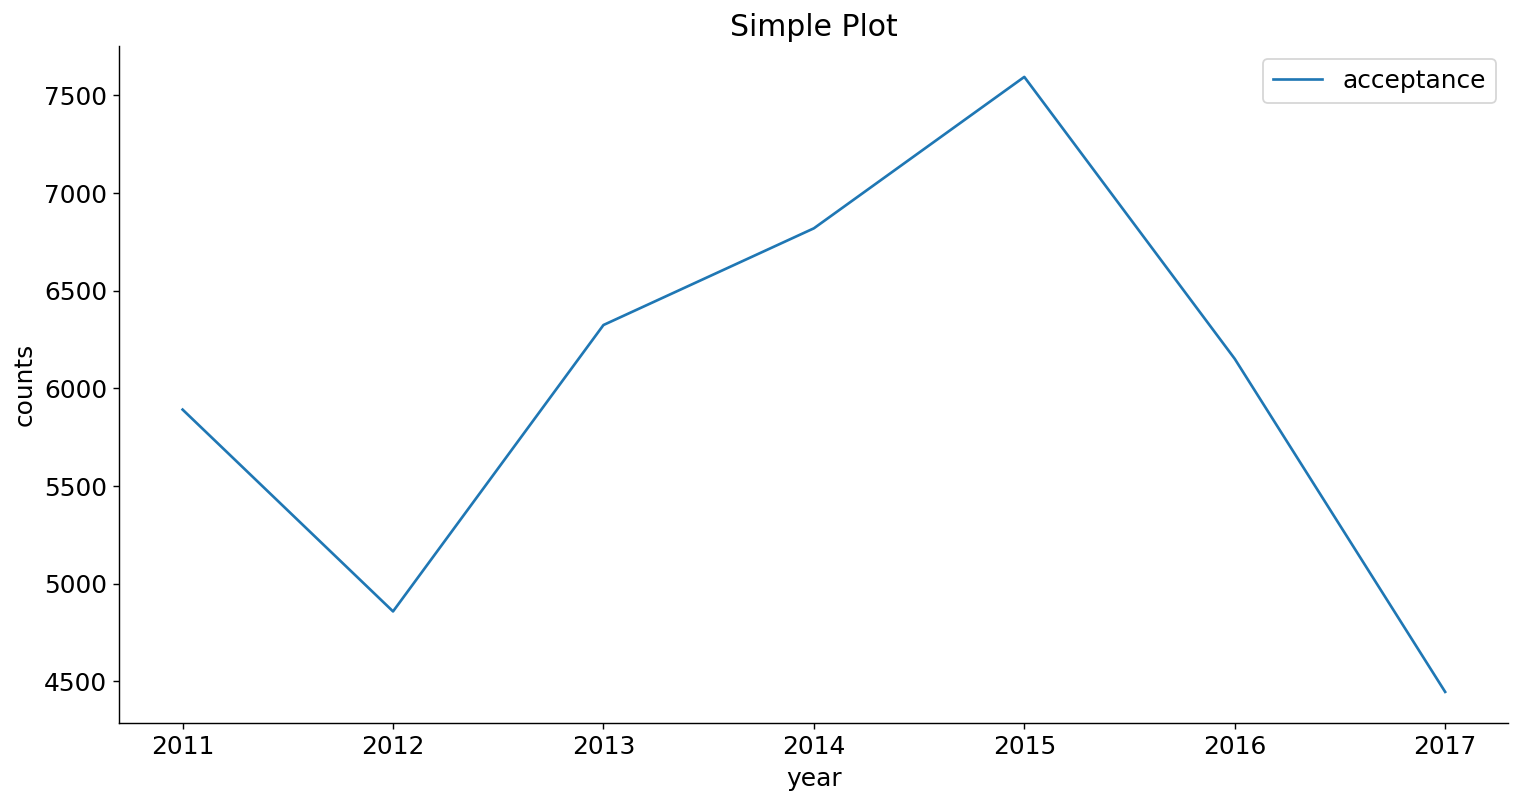

In [33]:
fig = plt.figure()
plt.plot(hist["year"], hist["counts"], label='acceptance')
plt.xlabel('year')
plt.ylabel('counts')
plt.title("Simple Plot")
plt.legend()
plt.show()

In [34]:
data_frame = df.drop('year', axis = 1) 
data_frame.to_csv("2011-2017_short.csv",index=False)

In [37]:
# df.to_csv("2014-2017.csv",index=False)

In [36]:
# df.corr()